In [1]:
import gym

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch

#from ReplayMemory import ReplayMemory, Transition
from DDQN import DDQN
from config import config
from off_policy import off_policy_train

## SETTING

In [2]:
#== CONFIGURATION ==
print('='*4 + ' CONFIGURATION ' + '='*4)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
CONFIG = config(RENDER=False, LR_A_END=5e-4, DOUBLE=True, BATCH_SIZE=64)
for key, value in CONFIG.__dict__.items():
    if key[:1] != '_': print(key, value) 
        
#== ENVIRONMENT ==
env = gym.make(CONFIG.ENV_NAME)
env.seed(1)
s_dim = env.observation_space.shape[0]
a_dim = env.action_space.shape[0]

#== AGENT ==
act_num = 5
agent=DDQN(s_dim, act_num, device, CONFIG)

==== CONFIGURATION ====
cpu
MAX_EPISODES 200
MAX_EP_STEPS 200
LR_A 0.001
LR_A_END 0.0005
LR_C 0.002
EPSILON 0.9
EPSILON_END 0.05
GAMMA 0.9
TAU 0.01
MEMORY_CAPACITY 10000
BATCH_SIZE 64
RENDER False
ENV_NAME Pendulum-v0
MAX_MODEL 5
TARGET_UPDATE 10
DOUBLE True
[-2. -1.  0.  1.  2.]


## TRAINING

In [3]:
r_enhance = lambda r: (r + 8)/8 # reward \in [~-16, 0] -> shift to about [-1, 1]
training_records = off_policy_train(env, agent, CONFIG, r_enhance)

Ep[  0]: Running Reward: -1030.15 	 Real Reward: -1301.48
Ep[ 10]: Running Reward: -1247.36 	 Real Reward: -1213.18
Ep[ 20]: Running Reward: -1155.16 	 Real Reward: -955.53
Ep[ 30]: Running Reward: -762.81 	 Real Reward: -132.51
Ep[ 40]: Running Reward: -362.19 	 Real Reward: -129.40
Ep[ 50]: Running Reward: -247.31 	 Real Reward: -133.74
Ep[ 60]: Running Reward: -253.32 	 Real Reward: -386.73
Ep[ 70]: Running Reward: -245.66 	 Real Reward: -131.01
Ep[ 80]: Running Reward: -259.24 	 Real Reward: -347.25
Ep[ 90]: Running Reward: -212.41 	 Real Reward: -251.48
Ep[100]: Running Reward: -183.98 	 Real Reward: -244.38
 199Solved! Running reward is now -139.74!


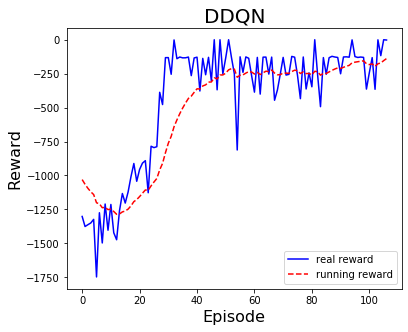

In [4]:
fig = plt.figure(figsize=(6,4.8))
ax = fig.add_subplot(111)
ax.plot([r.ep for r in training_records], [r.reward for r in training_records], 'b-', label='real reward')
ax.plot([r.ep for r in training_records], [r.avg_reward for r in training_records], 'r--', label='running reward')
ax.set_title('DDQN', fontsize=20)
ax.set_xlabel('Episode', fontsize=16)
ax.set_xticks(np.arange(0, 120, 20))
ax.set_ylabel('Reward', fontsize=16)
ax.legend()
plt.savefig("../img/ddqn.png")
plt.show()